In [1]:
!pip install gluoncv

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

# Downloading image

In [5]:
image_url='https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath='dog.jpg'
gcv.utils.download(url=image_url,path=image_filepath)

100%|██████████| 160/160 [00:00<00:00, 4340.78KB/s]


'dog.jpg'

In [8]:
image=mx.image.imread(image_filepath)
print('shape : ',image.shape)
print('type : ',image.dtype)
print('min : ',image.min().asscalar())
print('max : ',image.max().asscalar())

shape :  (576, 768, 3)
type :  <class 'numpy.uint8'>
min :  0
max :  255


# visualize image

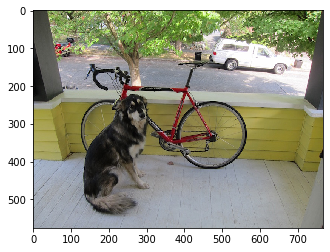

In [9]:
plt.imshow(image.asnumpy())

# Transform and batch images

In [10]:
image, chw_image=gcv.data.transforms.presets.yolo.transform_test(image, short=512)

In [11]:
print('shape : ',image.shape)
print('type : ',image.dtype)
print('min : ',image.min().asscalar())
print('max : ',image.max().asscalar())

shape :  (1, 3, 512, 683)
type :  <class 'numpy.float32'>
min :  -2.117904
max :  2.64


# Visualizing CHW image

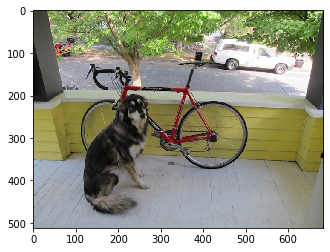

In [12]:
plt.imshow(chw_image)

# Loading network -yolo-darknet53-coco version

In [13]:
network=gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

100%|██████████| 224190/224190 [00:04<00:00, 49449.71KB/s]


# Making prediction

In [15]:
prediction=network(image)
type(prediction)

tuple

In [17]:
for index,array in enumerate(prediction):
    print('#{} shape : {}'.format(index+1,array.shape))

#1 shape : (1, 100, 1)
#2 shape : (1, 100, 1)
#3 shape : (1, 100, 4)


# Unpack prediction -removing extra dimension added during preprocessing steps

In [18]:
prediction=[array[0] for array in prediction]
class_indicies,probabilities, bounding_boxes=prediction

In [20]:
k=10
print("class_indicies : ",class_indicies[:k])
print("probability: ",probabilities[:k])
print("boundaryboxes : ",bounding_boxes[:k])

class_indicies :  
[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>
probability:  
[[ 0.9919528 ]
 [ 0.9600398 ]
 [ 0.62269706]
 [ 0.29241988]
 [ 0.01795176]
 [ 0.01141727]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>
boundaryboxes :  
[[116.53648  201.33237  281.90326  482.0909  ]
 [ 93.92972  107.739395 504.7513   375.7542  ]
 [416.78833   69.800644 615.01794  148.89008 ]
 [416.78833   69.800644 615.01794  148.89008 ]
 [ 90.883545 125.878815 504.4449   402.7955  ]
 [532.78235   91.84184  547.3104   104.6911  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


# OUTPUT

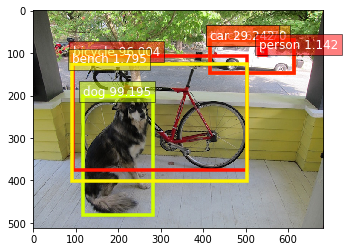

In [22]:
gcv.utils.viz.plot_bbox(chw_image,bounding_boxes,probabilities*100,class_indicies,class_names=network.classes)